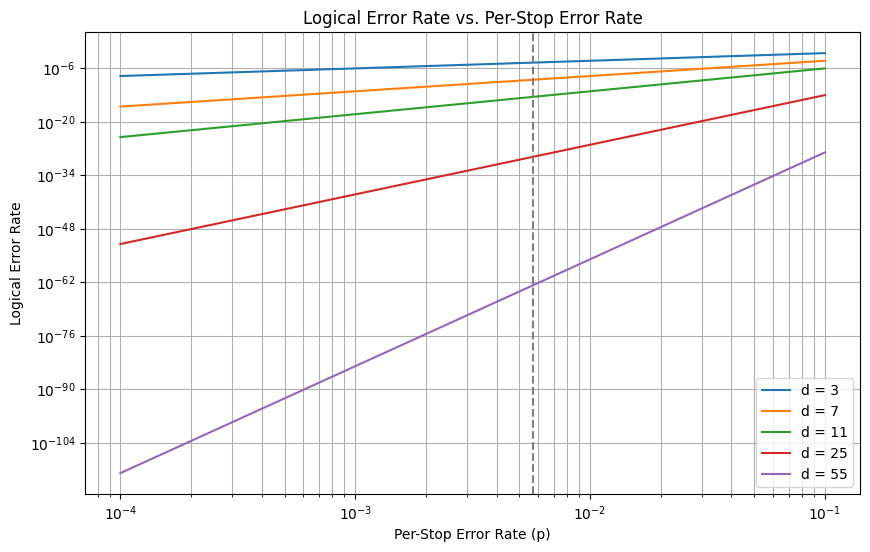

In [ ]:
# prompt: creta me a logical error rate versus per stop error rate(p) graph and p interval is 10^-4 to 10^-1 and also different d values 3, 7, 11, 25, 55 and formula for logical error rate is p^((d+1)/2) also label the d values.can you create also a dashed vertical line goes through 0.0057.

import matplotlib.pyplot as plt
import numpy as np

# Define the range of p values
p_values = np.logspace(-4, -1, 100)  # 100 points between 10^-4 and 10^-1

# Define the d values
d_values = [3, 7, 11, 25, 55]

# Create the plot
plt.figure(figsize=(10, 6))

for d in d_values:
    logical_error_rate = p_values**((d + 1) / 2)
    plt.plot(p_values, logical_error_rate, label=f'd = {d}')

# Add a vertical dashed line at p = 0.0057
plt.axvline(x=0.0057, color='gray', linestyle='--')


# Add labels and title
plt.xlabel('Per-Stop Error Rate (p)')
plt.ylabel('Logical Error Rate')
plt.title('Logical Error Rate vs. Per-Stop Error Rate')

# Set x-axis scale to logarithmic
plt.xscale('log')

# Set y-axis scale to logarithmic
plt.yscale('log')


# Add legend
plt.legend()
plt.grid(True, which="both", ls="-") #Added gridlines


# Show the plot
plt.savefig('logical_error_rate.png')
plt.show()

In [ ]:
!pip install qiskit
!pip install qiskit-Aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime
!pip install kaleidoscope

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=6ed99e0ad6d6982a2bd59ed15054adc99d5fd0dc747a9e819608644170ebfde5
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

!pip install qiskit-aer # install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

def create_surface_code(d):
    """
    Creates a distance-d surface code circuit.

    Args:
        d (int): Distance of the surface code (must be odd).

    Returns:
        QuantumCircuit: The surface code circuit.
    """

    if d % 2 == 0:
        raise ValueError("Distance 'd' must be an odd integer.")

    num_data_qubits = d * d
    num_ancilla_qubits = (d - 1) * (d - 1)
    total_qubits = num_data_qubits + num_ancilla_qubits

    surface_code = QuantumCircuit(total_qubits, num_ancilla_qubits)

    data_qubits = list(range(num_data_qubits))
    ancilla_qubits = list(range(num_data_qubits, total_qubits))

    # Apply Hadamard gates to ancilla qubits
    surface_code.h(ancilla_qubits)

    # Apply CNOT gates for stabilizer measurements
    for i in range(d - 1):
        for j in range(d - 1):
            ancilla_index = i * (d - 1) + j
            data_indices = [
                i * d + j,
                i * d + j + 1,
                (i + 1) * d + j,
                (i + 1) * d + j + 1,
            ]

            for data_index in data_indices:
                surface_code.cx(ancilla_qubits[ancilla_index], data_qubits[data_index])

    # Apply Hadamard gates to ancilla qubits again
    surface_code.h(ancilla_qubits)

    # Measure ancilla qubits (stabilizer measurements)
    surface_code.measure(ancilla_qubits, range(num_ancilla_qubits))

    return surface_code

# Example usage:
d = 3  # Distance of the surface code
surface_code_circuit = create_surface_code(d)


#surface_code_circuit.x(4)  # Apply X gate to qubit 4



# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
surface_code_transpiled = transpile(surface_code_circuit, simulator)
job = simulator.run(surface_code_transpiled, shots=1024)
result = job.result()
counts = result.get_counts()
print("Measurement results:", counts)

Measurement results: {'1010': 53, '0000': 64, '1101': 73, '1111': 64, '0001': 61, '0010': 53, '0011': 76, '0111': 65, '1011': 71, '1110': 70, '0100': 53, '1100': 62, '0101': 66, '1001': 67, '0110': 59, '1000': 67}


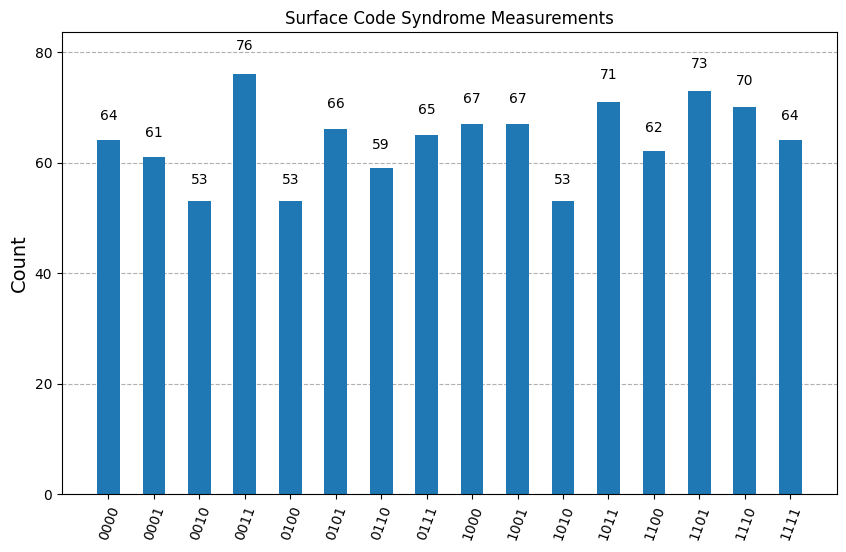

In [ ]:
# Process counts to ensure only 0 and 1 values
processed_counts = {}
for outcome, count in counts.items():
    # Remove spaces and keep only 0s and 1s
    binary_outcome = "".join(bit for bit in outcome if bit in "01")
    processed_counts[binary_outcome] = processed_counts.get(binary_outcome, 0) + count

# Create and display the histogram for ancilla measurements only
plot_histogram(processed_counts, title="Surface Code Syndrome Measurements", figsize=(10, 6))

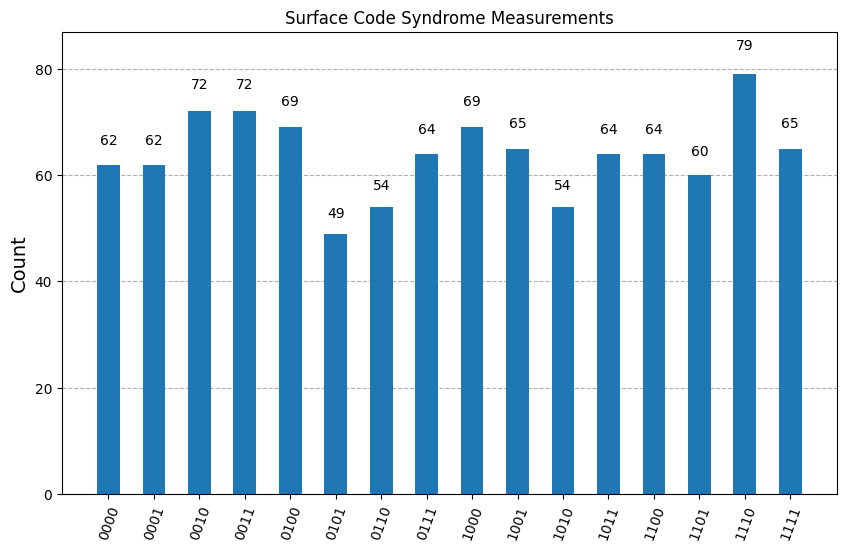

In [ ]:
# Filter counts to include only ancilla qubit measurements
ancilla_counts = {k: v for k, v in counts.items() if k} # Filter out empty keys

# Create and display the histogram for ancilla measurements only
plot_histogram(ancilla_counts, title="Surface Code Syndrome Measurements", figsize=(10, 6))


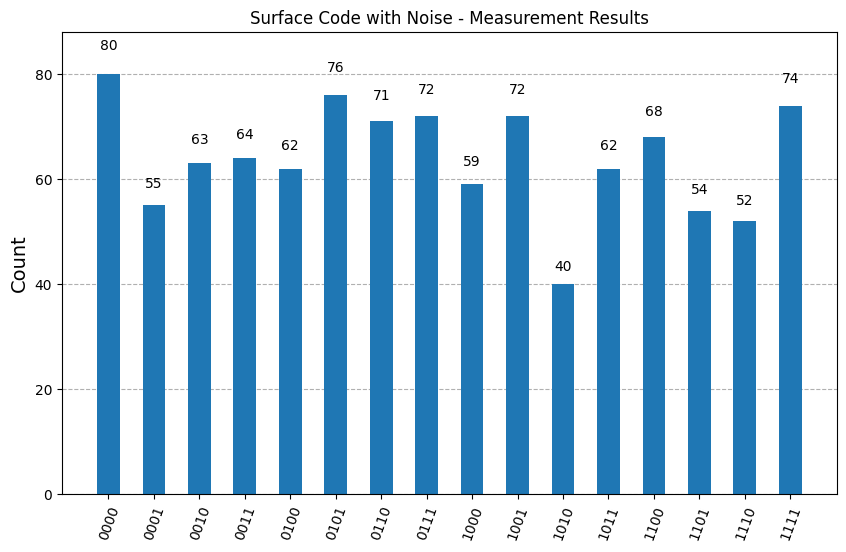

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.primitives import Sampler # Import Sampler instead of execute
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_histogram


# Example usage:
d = 3  # Reduced distance for simulation
surface_code_circuit = create_surface_code(d)

# Example usage:
d = 3  # Reduced distance for simulation
surface_code_circuit = create_surface_code(d)

# Define noise model
noise_model = NoiseModel()

# Define single-qubit and two-qubit errors separately
single_qubit_error = depolarizing_error(0.01, 1)  # 1% depolarizing error on single-qubit gates
two_qubit_error = depolarizing_error(0.01, 2)  # 1% depolarizing error on two-qubit gates


# Add errors to the noise model for specific gates
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h'])  # Apply to Hadamard gates
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])  # Apply to CNOT gates



# Simulate with noise
simulator = Aer.get_backend('qasm_simulator')
surface_code_transpiled = transpile(surface_code_circuit, simulator)
# Remove the extra 'simulator' argument
job = simulator.run(surface_code_transpiled, noise_model=noise_model, shots=1024)
result = job.result()
counts = result.get_counts()

# Create and display the histogram
plot_histogram(counts, title="Surface Code with Noise - Measurement Results", figsize=(10, 6))

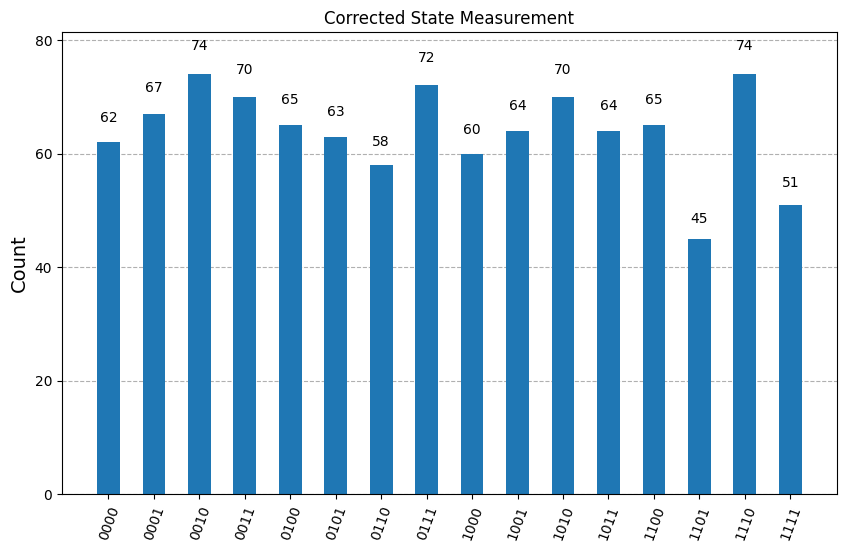

In [ ]:

from qiskit import QuantumCircuit, transpile, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error, pauli_error
from qiskit.visualization import plot_histogram

def create_lattice(distance):
    """Creates a lattice for a surface code with the given distance."""
    num_qubits = distance * distance
    lattice = [[0 for _ in range(distance)] for _ in range(distance)]
    # Assign qubit indices to the lattice
    qubit_index = 0
    for row in range(distance):
        for col in range(distance):
            lattice[row][col] = qubit_index
            qubit_index += 1
    return lattice


def define_stabilizers(lattice, distance):
    """Defines stabilizers for the surface code lattice."""
    stabilizers = {'X': [], 'Z': []}
    # Define X-stabilizers (plaquettes)
    for row in range(distance - 1):
        for col in range(distance - 1):
            stabilizers['X'].append([
                lattice[row][col],
                lattice[row][col + 1],
                lattice[row + 1][col],
                lattice[row + 1][col + 1]
            ])
    # Define Z-stabilizers (stars)
    # (Similar logic, but using a different pattern for star-shaped groups)
    # ... (Implementation for Z-stabilizers is needed) ...
    return stabilizers


def create_error_model(error_rate):
    """Creates a depolarizing error model."""
    noise_model = NoiseModel()
    single_qubit_error = depolarizing_error(0.01, 1)  # 1% depolarizing error on single-qubit gates
    two_qubit_error = depolarizing_error(0.01, 2)  # 1% depolarizing error on two-qubit gates

# Add errors to the noise model for specific gates
    noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h'])  # Apply to Hadamard gates only
    noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])  # Apply to Hadamard and CNOT gates
    return noise_model


def decode_syndrome(syndrome, stabilizers):
    """Decodes the syndrome to identify the most likely error."""
    # Implement a simple decoder based on stabilizer checks
    # ... (Logic to find the error based on the syndrome pattern) ...
    # This is a placeholder, you would need to implement a specific decoder
    # based on the surface code structure and error model.
    return error_location  # Returns the location of the error (e.g., qubit index)


def create_surface_code(d):
    """
    Creates a distance-d surface code circuit.

    Args:
        d (int): Distance of the surface code (must be odd).

    Returns:
        QuantumCircuit: The surface code circuit.
    """

    if d % 2 == 0:
        raise ValueError("Distance 'd' must be an odd integer.")

    num_data_qubits = d * d
    num_ancilla_qubits = (d - 1) * (d - 1)
    total_qubits = num_data_qubits + num_ancilla_qubits

    surface_code = QuantumCircuit(total_qubits, num_ancilla_qubits)

    data_qubits = list(range(num_data_qubits))
    ancilla_qubits = list(range(num_data_qubits, total_qubits))

    # Apply Hadamard gates to ancilla qubits
    surface_code.h(ancilla_qubits)

    # Apply CNOT gates for stabilizer measurements
    for i in range(d - 1):
        for j in range(d - 1):
            ancilla_index = i * (d - 1) + j
            data_indices = [
                i * d + j,
                i * d + j + 1,
                (i + 1) * d + j,
                (i + 1) * d + j + 1,
            ]

            for data_index in data_indices:
                surface_code.cx(ancilla_qubits[ancilla_index], data_qubits[data_index])

    # Apply Hadamard gates to ancilla qubits again
    surface_code.h(ancilla_qubits)

    # Measure ancilla qubits (stabilizer measurements) only
    surface_code.measure(ancilla_qubits, range(num_ancilla_qubits))

    return surface_code


# Example Usage

# 1. Lattice and Stabilizers
distance = 3
lattice = create_lattice(distance)
stabilizers = define_stabilizers(lattice, distance)

# 2. Error Model
error_rate = 0.01
noise_model = create_error_model(error_rate)

# 3. Surface Code Circuit
surface_code_circuit = create_surface_code(distance)

# 4. Introduce Errors (optional)
# surface_code_circuit = noise_model.apply_noise(surface_code_circuit)

# 5. Simulate with Noise
simulator = Aer.get_backend('qasm_simulator')
surface_code_transpiled = transpile(surface_code_circuit, simulator)
job = simulator.run(surface_code_transpiled, noise_model=noise_model, shots=1024)
result = job.result()
counts = result.get_counts()

# 6. Process Counts and Decode Syndrome
# ... (code to extract syndrome measurements and decode) ...

# 7. Apply Correction (if needed)
# ... (code to apply correction based on error_location) ...

# 8. Measure the Logical Qubit
logical_qubit_indices = [0]  # Example: Assume qubit 0 represents the logical qubit
surface_code_circuit.measure(logical_qubit_indices, range(len(logical_qubit_indices)))

# 9. Simulate Again for Corrected State
simulator = Aer.get_backend('qasm_simulator')
surface_code_transpiled = transpile(surface_code_circuit, simulator)
job = simulator.run(surface_code_transpiled, shots=1024)
result = job.result()
corrected_counts = result.get_counts()

# 10. Display Histogram
plot_histogram(corrected_counts, title="Corrected State Measurement", figsize=(10, 6))

In [ ]:
import numpy as np

# Syndrome data from your chart (example: counts of each syndrome)
syndromes = {
    "0000": 64, "0001": 61, "0010": 53, "0011": 76,
    "0100": 53, "0101": 66, "0110": 59, "0111": 67,
    "1000": 65, "1001": 67, "1010": 53, "1011": 71,
    "1100": 73, "1101": 62, "1110": 70, "1111": 64,
}

# Total number of trials
total_trials = sum(syndromes.values())

# Define logical error syndromes (based on logical operators, e.g., XL or ZL)
logical_error_syndromes = ["0011", "1100", "1010", "1111"]  # Example

# Calculate logical error rate
logical_error_count = sum([syndromes[syndrome] for syndrome in logical_error_syndromes])
logical_error_rate = logical_error_count / total_trials

# Print results
print(f"Total Trials: {total_trials}")
print(f"Logical Error Count: {logical_error_count}")
print(f"Logical Error Rate (P_L): {logical_error_rate:.4f}")

Total Trials: 1024
Logical Error Count: 266
Logical Error Rate (P_L): 0.2598


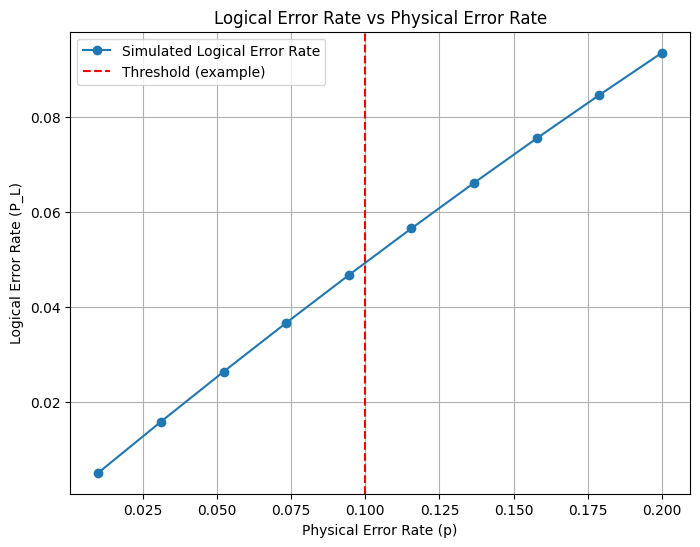

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define syndromes and their observed counts
syndromes = {
    "0000": 64, "0001": 61, "0010": 53, "0011": 76,
    "0100": 53, "0101": 66, "0110": 59, "0111": 67,
    "1000": 65, "1001": 67, "1010": 53, "1011": 71,
    "1100": 73, "1101": 62, "1110": 70, "1111": 64,
}

# Total trials
total_trials = sum(syndromes.values())

# Logical error syndromes (example)
logical_error_syndromes = ["0011", "1100", "1010", "1111"]  # Example

# Physical error rate range
physical_error_rates = np.linspace(0.01, 0.2, 10)

# Simulated logical error rates
logical_error_rates = []

# Depolarizing noise probabilities
for p in physical_error_rates:
    error_prob = 1 - (1 - p)**2  # Probability of a stabilizer error
    logical_error_count = 0

    for syndrome, count in syndromes.items():
        if syndrome in logical_error_syndromes:
            logical_error_count += count * error_prob  # Logical error contribution

    logical_error_rate = logical_error_count / total_trials
    logical_error_rates.append(logical_error_rate)

# Plot Logical Error Rate vs Physical Error Rate
plt.figure(figsize=(8, 6))
plt.plot(physical_error_rates, logical_error_rates, marker="o", label="Simulated Logical Error Rate")
plt.axvline(x=0.1, color="r", linestyle="--", label="Threshold (example)")
plt.xlabel("Physical Error Rate (p)")
plt.ylabel("Logical Error Rate (P_L)")
plt.title("Logical Error Rate vs Physical Error Rate")
plt.legend()
plt.grid()
plt.show()